## ex1. Multiple linear regression: Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

#### Input data: ex1data2.txt

The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house=pd.read_csv('ex1data2.txt', names=['square', 'bedroom', 'price'])
# Check whether data are loaded correctly
print(house.head(2))
print('')
print(house.tail(2))
print('')
print(house.shape)

   square  bedroom   price
0    2104        3  399900
1    1600        3  329900

    square  bedroom   price
45    1852        4  299900
46    1203        3  239500

(47, 3)


### 1. Exploration on the house data

In [3]:
# There are 47 records with non-missing value for each record
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
square     47 non-null int64
bedroom    47 non-null int64
price      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
house.describe()
# Below are some descriptive statistics regarding the data

,square,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


[[1.         0.85498759]
 [0.85498759 1.        ]]


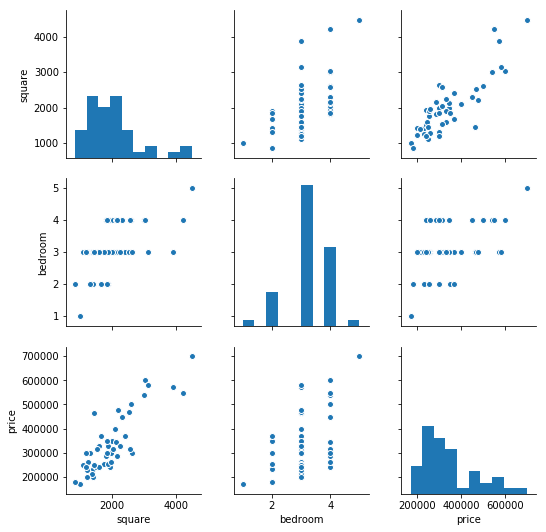

In [14]:
# From the below pairplot, sale price is positively related with square and number of bedrooms
print(np.corrcoef(x=house['price'], y=house['square']))
sns.pairplot(house)

In [15]:
X=house[['square', 'bedroom']]
y=house['price']
m=X.shape[0]

### 2. Feature Normalization

When features differ by orders of magnitude, first perform feature scaling can make gradient descent converge much more quickly.

1. Substract the mean value of each feature from the dataset
2. Divide the feature value by their standard deviation
3. When normalizing the features, it is important to store the values used for normalization. Given a new X value, we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [17]:
def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X 
    FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each feature is 0 
    and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    mu=X.mean()
    sigma=X.std()
    X_norm=(X-mu)/sigma
    return (X_norm, mu, sigma) #Return a tuple

In [21]:
(X_norm, mu, sigma)=featureNormalize(X)
print("The mean mu: ")
print(mu)
print("The standard deviation sigma:")
print(sigma)

The mean mu: 
square     2000.680851
bedroom       3.170213
dtype: float64
The standard deviation sigma:
square     794.702354
bedroom      0.760982
dtype: float64


In [33]:
# Create the design matrix X_norm by adding the x0=1
X_norm=pd.concat((pd.DataFrame(np.ones((m,1))),X_norm), axis=1)
X_norm.head(2)

,0,square,bedroom
0,1.0,0.13001,-0.223675
1,1.0,-0.50419,-0.223675


### 3. Gradient descent

In [34]:
def computeCost(X, y, theta):
    
    """
    Compute cost function J(theta) for multiple linear regression
    X: feature matrix including the x0=1 for intercept
    y: response variable
    theta: initial value of the theta
    """
    m = X.shape[0]# number of training examples
    J=1/(2)*((X.dot(theta)[0]-y)**2).mean()
    return J

In [35]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    """
    GRADIENTDESCENT Performs gradient descent to learn theta 
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    theta: initial value
    alpha: learning rate
    num_iters: Number of iterations
    """

# Initialize some useful values
    m,n = X.shape # number of training examples and features
    J_history = np.zeros((num_iters, 1))
    theta_history=np.zeros((num_iters, n))
    
    for iter in range(num_iters):
        theta=theta-np.array((alpha/m*np.array((X.dot(theta)[0]-y)).reshape(1,m).dot(X))).reshape(n,1)

    # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
        theta_history[iter]=theta.reshape(1,n)

    return theta, J_history, theta_history # return a tuple

In [39]:
theta1, J_history, theta_history=gradientDescent(X_norm, y, np.zeros((3,1)), 0.05, 2000)
print(theta1) # array

[[340412.65957447]
 [110631.05027885]
 [ -6649.47427082]]


In [42]:
# Predict future house price
x0=np.array([1650,3])
x0_norm=np.array((x0-mu)/sigma)

(2,)

In [43]:
# predict future house price
x0=np.array([1650,3])
x0_norm=np.array((x0-mu)/sigma) #change to array so there is no warning message for the reshape
x0_final=pd.concat((pd.DataFrame([1]), pd.DataFrame(x0_norm.reshape(1,2))), axis=1)
y_pred=x0_final.dot(theta1)
print('The predicted house price with 1650 square feet and 3 bedrooms is: ',y_pred.iloc[0][0])

The predicted house price with 1650 square feet and 3 bedrooms is:  293081.4643348957


### 4. Selecting learning rate

(1) If the learning rate is small, the convergence will be sholw.

(2) If the learning rate is big, then it might diverge and overshoot the minimum value

In [53]:
alpha=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
J=np.zeros((50, len(alpha)))

In [54]:
for i in range(len(alpha)):
    J[:,i]=gradientDescent(X_norm, y, np.zeros((3,1)), alpha[i], 50)[1].reshape(50,)

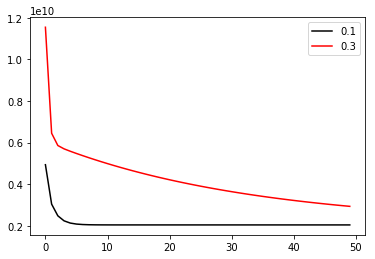

In [88]:
#plt.plot(range(50), J[:,0], C='r', label='0.001')  #converge very show
#plt.plot(range(50), J[:,1], C='b', label='0.003')   #converge very slow
#plt.plot(range(50), J[:,2], C='m', label='0.01')
#plt.plot(range(50), J[:,3], C='y', label='0.03')
plt.plot(range(50), J[:,4], C='k', label='0.1')
plt.plot(range(50), J[:,5], C='r', label='0.3')
#plt.plot(range(50), J[:,6], C='c', label='1')  # overshoot, too big to show
#plt.plot(range(50), J[:,7], C='g', label='3')  # overshoot, too big to show
plt.legend(loc='upper right')

### 5. Solve the linear regression by Normal equations
J(theta)=1/2*(y-x*theta)'*(y-x*theta), J(theta) is a number
Setting dJ(theta)/dtheta=0, and use the trace(J(theta))=J(theta), we get
theta=inv(x'x)*x'y

numpy.linalg.pinv. Compute the (Moore-Penrose) pseudo-inverse of a matrix. Calculate the generalized inverse of a matrix using its singular-value decomposition (SVD) and including all large singular values. 

In [58]:
X=pd.concat((pd.DataFrame(np.ones((m,1))), X), axis=1)
X.shape

(47, 3)

In [59]:
theta=np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y))

In [62]:
# Predict y_predict with square of 1650 and 3 bedrooms
y_predict=np.array([1, 1650, 3]).dot(theta)
print(y_predict)
# we can see that the predicted value from normal equaltion is almost the same as that from the gradient descent

293081.46433498873


### 6. Comparison between the gradient descent and normal equation method

##### Normal equation.
(1) No need to choose alpha

(2) No iteration

(3) Need to compute np.linalg.pinv(X'X) which has time complexity of O(n^3)

(4) Slow if n is large

##### Gradient descent

(1) Need to choose alpha

(2) Need many iterations

(3) Works well even if n is large (n=10^6)